In [ ]:
# First, import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (replace 'purchase_data.csv' with the actual filename)
data = pd.read_csv('/content/shopping_trends (1).csv')

# Display first few rows of the data to understand its structure
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


Trending item among females and males:
 Gender
Female    Blouse
Male       Pants
dtype: object


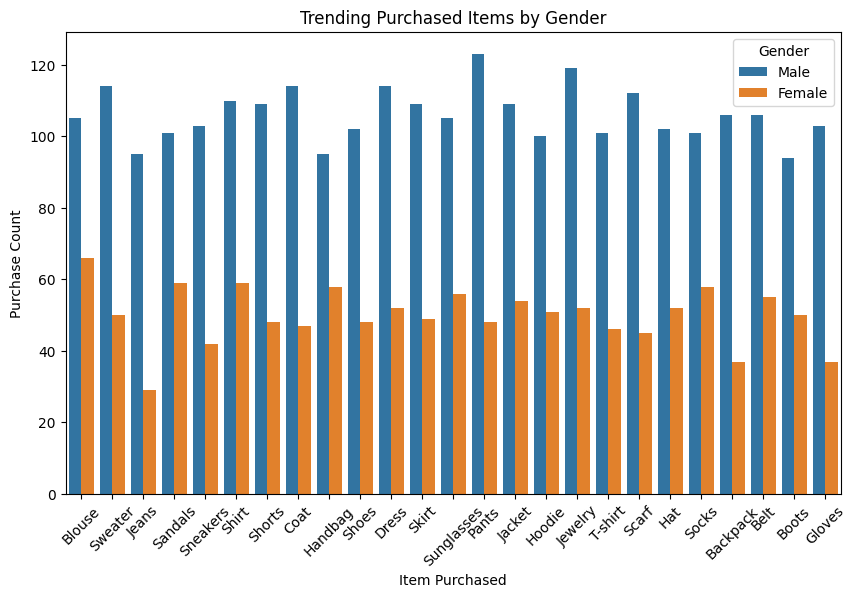

In [ ]:
# Question 1: Which purchased item is trending among females and males?
gender_trend = data.groupby(['Gender', 'Item Purchased']).size().unstack().fillna(0)
gender_trending_items = gender_trend.idxmax(axis=1)
print("Trending item among females and males:\n", gender_trending_items)

# Visualization: Gender-wise trending items
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Item Purchased', hue='Gender')
plt.title("Trending Purchased Items by Gender")
plt.xlabel("Item Purchased")
plt.ylabel("Purchase Count")
plt.xticks(rotation=45)
plt.show()

Trending item by location:
 Location
Alabama            Jewelry
Alaska            Backpack
Arizona           Backpack
Arkansas            Gloves
California           Dress
Colorado            Hoodie
Connecticut           Coat
Delaware             Pants
Florida               Coat
Georgia              Dress
Hawaii             Handbag
Idaho                 Belt
Illinois             Shirt
Indiana              Skirt
Iowa               Sweater
Kansas              Blouse
Kentucky           Handbag
Louisiana           Hoodie
Maine                Shoes
Maryland             Skirt
Massachusetts        Boots
Michigan           Sandals
Minnesota            Skirt
Mississippi        Handbag
Missouri          Sneakers
Montana               Coat
Nebraska          Backpack
Nevada            Backpack
New Hampshire       Blouse
New Jersey            Belt
New Mexico          Hoodie
New York            Gloves
North Carolina      Gloves
North Dakota        Jacket
Ohio               Sandals
Oklahoma          

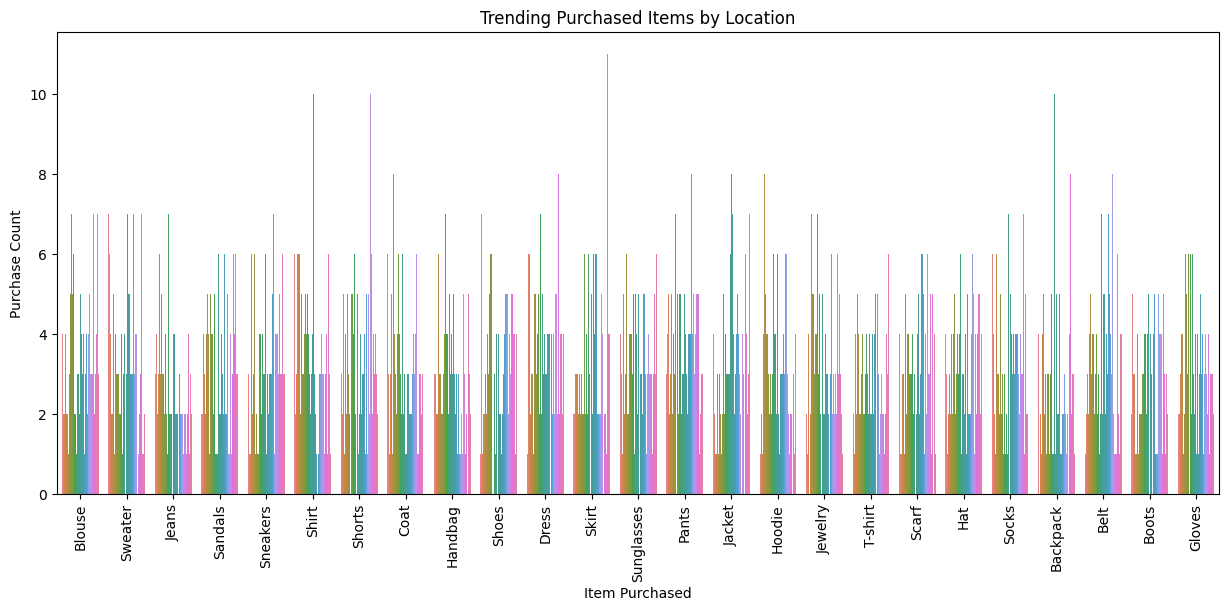

In [ ]:
# Question 2: Which purchased item is trending in different locations?
location_trend = data.groupby(['Location', 'Item Purchased']).size().unstack().fillna(0)
location_trending_items = location_trend.idxmax(axis=1)
print("Trending item by location:\n", location_trending_items)

# Visualization: Location-wise trending items
plt.figure(figsize=(15, 6))
sns.countplot(data=data, x='Item Purchased', hue='Location')
plt.title("Trending Purchased Items by Location")
plt.xlabel("Item Purchased")
plt.ylabel("Purchase Count")
plt.xticks(rotation=90)
plt.legend([], [], frameon=False)  # This removes the legend
plt.show()


Trending colors by gender:
 Gender
Female    Yellow
Male      Silver
dtype: object


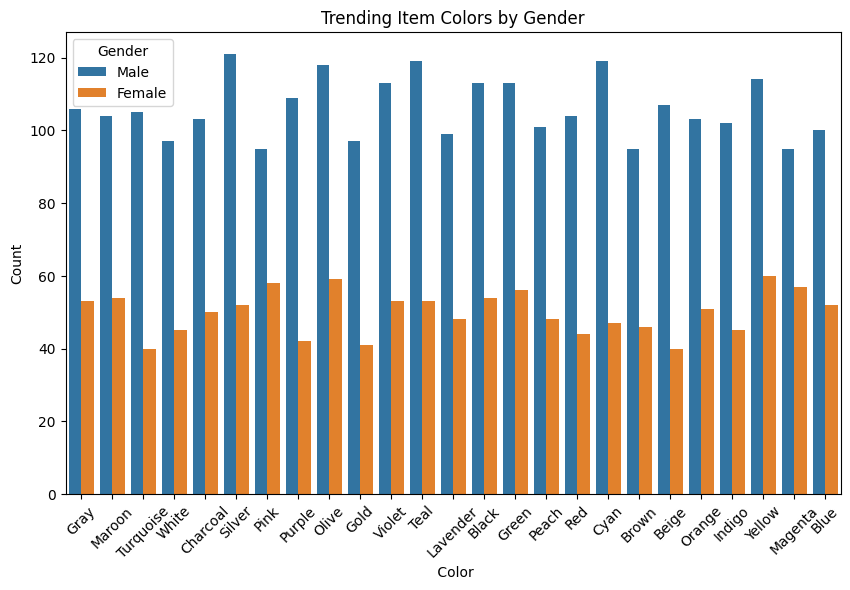

In [ ]:
# Question 3: Which item color is trending among females and males?
gender_color_trend = data.groupby(['Gender', 'Color']).size().unstack().fillna(0)
gender_trending_colors = gender_color_trend.idxmax(axis=1)
print("Trending colors by gender:\n", gender_trending_colors)

# Visualization: Gender-wise color trend
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Color', hue='Gender')
plt.title("Trending Item Colors by Gender")
plt.xlabel(" Color")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Trending item by color:
 Color
Beige           Sandals
Black             Skirt
Blue               Belt
Brown               Hat
Charcoal          Dress
Cyan              Pants
Gold              Shoes
Gray            Jewelry
Green            Hoodie
Indigo          Jewelry
Lavender     Sunglasses
Magenta          Blouse
Maroon            Shoes
Olive        Sunglasses
Orange          Sweater
Peach           Jewelry
Pink             Hoodie
Purple          Sandals
Red             Jewelry
Silver             Coat
Teal              Skirt
Turquoise         Pants
Violet           Blouse
White              Coat
Yellow           Shorts
dtype: object


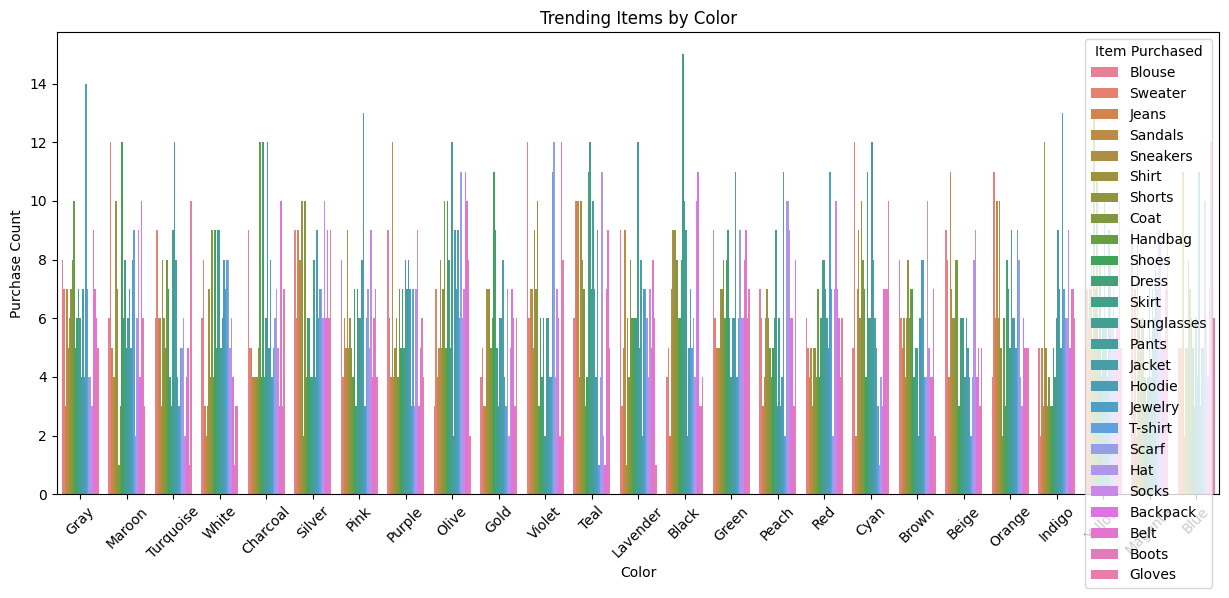

In [ ]:
# Question 4: Does color determine the trending purchased item?
color_item_trend = data.groupby(['Color', 'Item Purchased']).size().unstack().fillna(0)
color_trending_items = color_item_trend.idxmax(axis=1)
print("Trending item by color:\n", color_trending_items)

# Visualization: Color-based trending items
plt.figure(figsize=(15, 6))
sns.countplot(data=data, x='Color', hue='Item Purchased')
plt.title("Trending Items by Color")
plt.xlabel("Color")
plt.ylabel("Purchase Count")
plt.xticks(rotation=45)
plt.show()

<ipython-input-12-927baefce3af>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_item_trend = data.groupby(['Age Group', 'Item Purchased']).size().unstack().fillna(0)


Trending item by age group:
 Age Group
<20       Sweater
20-30       Skirt
30-40    Backpack
40-50       Scarf
50-60      Blouse
60+       Jewelry
dtype: object


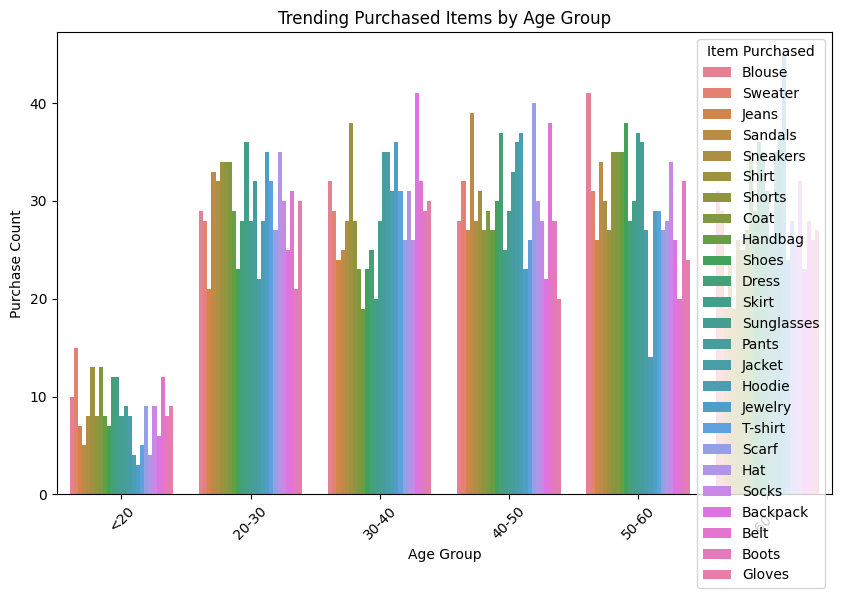

In [ ]:
# Question 5: Does age of the buyer determine the trending purchased item?
data['Age Group'] = pd.cut(data['Age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['<20', '20-30', '30-40', '40-50', '50-60', '60+'])
age_item_trend = data.groupby(['Age Group', 'Item Purchased']).size().unstack().fillna(0)
age_trending_items = age_item_trend.idxmax(axis=1)
print("Trending item by age group:\n", age_trending_items)

# Visualization: Age-based trend analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Age Group', hue='Item Purchased')
plt.title("Trending Purchased Items by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Purchase Count")
plt.xticks(rotation=45)
plt.show()